<center><h1><strong>Pengantar Sains Data - Prodi Fisika - A 2020</strong></h1></center>
<center><h2><strong><font color="blue">PSD-14-15: Korelasi, Regresi, & Clustering Analysis</font></strong></h2></center>
<img alt="" src="images/Cover.jpg"/>

<b><center>(C) Taufik Sutanto</center>
<center><h3><font color="blue">https://tau-data.id/glm-01/</font></h3></center>
<center><h3><font color="blue">https://tau-data.id/eda-03/</font></h3></center>

# Model Linear Regresi

* Covariance ==> Korelasi
* Korelasi ==> Regresi
* Regresi VS Interpolasi
* Evaluasi: RMSE & $R^2$
* Pendahuluan Clustering Analysis
* Pengelompokkan k-Means

# Berawal dari Pusat data dan Variansi

## $\bar{x}= \sum_{i=1}^{N}x_i$ dan $s^2=\frac{\sum_{i=1}^{N}(x_i-\bar{x})}{N-1}$

### Perhatikan makna rumus/formula variansi, lalu bandingkan dengan formula "covariansi" berikut:

# Contoh kasus sederhana

<img alt="" src="images/usia-tekDarah-korelasi-regresi-table.png" />

# Variance ke Covariance: Menghitung Hubungan Linear antara 2 variabel

* How? Bagaimana cara kerjanya? (Statistical Thinking)
* Konsepnya: "Co-Vary" sama-sama bervariansi menjauh dari rata-rata.
* Gunakan "reverse" thinking untuk memahaminya.
* Penggunaan: cov(x,y) = 2 VS cov(x,y) = -2 VS Cov(x,y) = 0
* Covariance = 3000? Apa artinya?

<img alt="" src="images/covariance.png" />

# Covariance ke korelasi: Statistical Thinking

* Korelasi sebenarnya adalah Covariance dibagi dengan masing-masing standar deviasinya.
* Apa maksud/maknanya?
* Covariance punya makna geometric .... ia adalah Cosine!... https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Geometric_interpretation

<img alt="" src="images/korelasi_pearson_formulae.png" />

<img alt="" src="images/perhitungan_korelasi.png" />

# Nilai koefisien korelasi (Linear) "Pearson"

* Nilai dari koefisien korelasi Pearson adalah dari -1 hingga +1.

<img alt="" src="images/korelasi_pearson_01.png" />

### Hati-hati

* Koefisien korelasi = 0 bukan berarti tidak ada hubungan antara kedua variable. Yang benar adalah: tidak ada hubungan LINIER, tapi bisa jadi ada hubungan dalam bentuk lain; misal: kuadratik, atau fungsi lain selain linier, seperti pada contoh di atas. 

# Interpretasi

* Nilai ~0.95 menunjukkan bahwa ada korelasi linier positif yang kuat antara usia dan tekanan darah. Ada kecenderungan bahwa usia tinggi berkaitan dengan tekanan darah yang kebih tinggi dibandingkan usia rendah.
* **WARNING**
* **Korelasi tidak sama (meng-implikasikan) dengan sebab akibat**. Perhatikan interpretasi di atas. Tidak dinyatakan bahwa jika usia tinggi maka tekanan darah rendah, hanya suatu tren atau kecenderungan. Mungkin saja usia dengan bertambahnya usia maka tekanan darah meningkat, tapi mungkin juga tekanan darah tinggi bukan karena usia, tapi faktor lain yang tidak teramati pada data.

* Contoh lain penelitian di Machine learning (kecantikan dan confidence/Panjang Jari dan IQ)

# Korelasi dan Sebab-Akibat

<img alt="" src="images/corr_causation_meme.jpg" />

### Semua orang yang minum air putih mati.

# Penilaian Kualitatif terhadap nilai korelasi seperti ini? ... Really? Why? Why not?

<img alt="" src="images/Corr_interpretation.png" />

[image Source: https://spencermath.weebly.com/home/interpreting-the-correlation-coefficient]

* Cases (social, medicine, etc)
* Objective, prediction vs insights.

In [2]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
plt.style.use('bmh'); sns.set()

data = {'usia':[40, 45, 50, 53, 60, 65, 69, 71], 'tekanan_darah':[126, 124, 135, 138, 142, 139, 140, 151]}
df = pd.DataFrame.from_dict(data)
df.head(8)

,usia,tekanan_darah
0,40,126
1,45,124
2,50,135
3,53,138
4,60,142
5,65,139
6,69,140
7,71,151


Covariance =  76.953125
Correlations =  [[1.         0.88746015]
 [0.88746015 1.        ]]


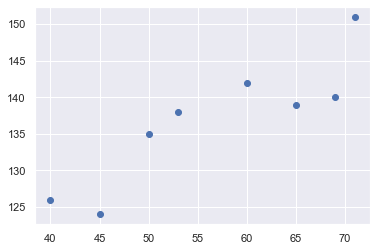

In [4]:
# Korelasi dan Scatter Plot untuk melihat datanya
print('Covariance = ', np.cov(df.usia, df.tekanan_darah, ddof=0)[0][1])
print('Correlations = ', np.corrcoef(df.usia, df.tekanan_darah))
plt.scatter(df.usia, df.tekanan_darah)
plt.show()

                  usia  tekanan_darah
usia           1.00000        0.88746
tekanan_darah  0.88746        1.00000


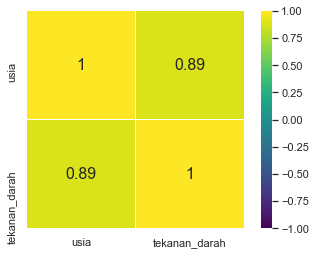

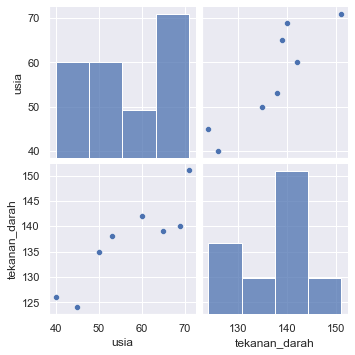

In [5]:
# Better
print(df.corr())
sns.heatmap(df.corr(),cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 16}, square=True)
p = sns.pairplot(df)

# Interpretasi

* Nilai 0.95 menunjukkan bahwa ada korelasi linier positif yang kuat antara usia dan tekanan darah. Ada kecenderungan bahwa usia tinggi berkaitan dengan tekanan darah yang kebih tinggi dibandingkan usia rendah.

## WARNING

* Korelasi tidak sama dengan sebab akibat. Perhatikan interpretasi di atas. Tidak dinyatakan bahwa jika usia tinggi maka tekanan darah rendah, hanya suatu tren atau kecenderungan. Mungkin saja usia dengan bertambahnya usia maka tekanan darah meningkat, tapi mungkin juga tekanan darah tinggi bukan karena usia, tapi faktor lain yang tidak teramati pada data.

### <font color="blue"> Sampai sini kita memahami kalau keduanya berhubungan, tapi seperti apa hubungannya kita masih belum bisa ketahui (lewat korelasi). Itulah Mengapa kita perlu Model Regresi. 

# Pendahuluan Model Regresi

* Digunakan saat variabel tak bebas (**Dependent variable** - Y) bertipe **numerik** (float/real) dan variabel bebasnya bisa numerik dan-atau kategorik

<p><img alt="" src="images/Supervised_Methods.png" /></p>


# Regresi Linier Sederhana


<img alt="" src="images/Reg_sederhana_01.png"/>

# Korelasi ke Regresi

<img alt="" src="images/reg_eq.png" />

<img alt="" src="images/regresi_linear_sederhana.png"/>

<img alt="" src="images/Rumus_Parameter_regresi_linear_sederhana.png"/>

<img alt="" src="images/perhitungan_regresi_sederhana.png"/>

# Evaluasi Error (Mean Squared Error)

<img alt="" src="images/mse_regresi.png" />

* Hati-hati,... perhatikan rumusnya dengan baik .... ia tidak robust terhadap outlier
* $\hat{y} = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$
* MSE = total jarak/selisih antara prediksi dan nilai dari data (sesungguhnya)
* RMSE = $\sqrt{MSE}$   ... why? 
* Evaluasi penting ketika kita ingin melakukan prediksi

# Beberapa contoh aplikasi regresi

1. **Predictive** Analytics: Memprediksi resiko, harga, penjualan, demand, dsb.

2. Operation Efficiency: Optimasi proses bisnis dengan melihat **hubungan antar variabel** dan mengambil policy berdasarkan hubungan tersebut.

3. Supporting Decisions: **Testing hypothesis**, misal terkait keuangan, operations dan customer purchases.

4. New **Insights**: Regresi dapat membantu menganalisa hubungan antar variabel dan sekaligus mem-filternya.

Sumber: https://www.newgenapps.com/blog/business-applications-uses-regression-analysis-advantages

* https://tau-data.id/glm-01/ dan https://tau-data.id/asumsi-statistika-benci-butuh/
<img alt="" src="images/Regression-model.jpg" />

In [3]:
# Fitting model Regresi Sederhana
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

lm = smf.ols("tekanan_darah ~ usia", data=df[['tekanan_darah','usia']]).fit()
lm.summary()
# 1. F-Stat. 
#.2. Uji Koef model
#.3. R^2
#.4. Interpretasi Model
#.5. Durbin-Watson ==> Time Series?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          tekanan_darah   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     22.25
Date:                Tue, 22 Dec 2020   Prob (F-statistic):            0.00327
Time:                        11:45:10   Log-Likelihood:                -21.920
No. Observations:                   8   AIC:                             47.84
Df Residuals:                       6   BIC:                             48.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.5623      8.266     11.924      0.000      78.337     118.788
usia           0.6766      0.143      4.717      0.003       0.326       1.028
==============================================================================
Omnibus:                        3.192   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                1.016
Skew:                          -0.340   Prob(JB):                        0.602
Kurtosis:                       1.392   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpretasi (Apa yang sebenarnya di prediksi oleh Model Regresi

<img alt="" src="images/Regresi_distribusi_Y.png" />

* image source: http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis

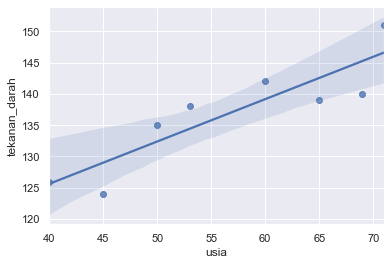

In [7]:
# Plot the Data
p = sns.regplot(df.usia, df.tekanan_darah)

# Pitfalls: Regresi Interpolation BUKAN Extrapolation (Forecasting/Peramalan)

<img alt="" src="images/regression_interpolation_extrapolation.png" />

image source: https://www.datasciencecentral.com/forum/topics/what-are-the-differences-between-prediction-extrapolation-and

* Penggunaan taksiran regresi untuk prediksi dapat dilakukan untuk x yang berada dalam rentang data. 

* Misal, untuk data usia dan tekanan darah, nilai x berada antara 40 hingga 71; sehingga hasil regresi tersebut hanya valid untuk x pada rentang itu, misal x = 50, 68, atau 69. 

* Jika ingin melakukan prediksi untuk x > 71, misal x = 75, atau x<40, misal x = 35, maka hasil yang diberikan tidak dapat diukur akurasinya. Ini dinamakan ekstrapolasi.

# Evaluasi $R^2$: Model VS Tidak Pakai Model?

<p><img alt="" src="images/R_Square.png" /></p>

# Pengaruh Variabel Tak Bebas ke Model


<p><img alt="" src="images/sig_var_di_Regresi.png" /></p>

* $SSR = SST - SSE = \sum{(y_i-\bar{y})^2} - \sum{(y_i-\hat{y_i})^2}$  

<img alt="" src="images/models_wrong_some_useful.png" />

### Perfect/true-best model tidak ada, bahkan seringnya tidak diperlukan

<p><img alt="" src="images/reg_types.png" /></p>

[image source: https://www.slideshare.net/mahakvijay3/basics-of-regression-analysis]

In [ ]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

In [2]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

<img src="images/clustering_Quotes.png" />

# Definition

## Clustering is as a process of finding group structures within data such that each instance within a group is similar to one another and dissimilar to instances in other groups [1]

<img src="images/clusters_objective.jpg" />


### [1]. Jain, A.K., Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 2010. 31(8): p. 651-666.

## Applications

Clustering analysis applications can be divided into two broad categories: 

* clustering for utility (e.g., data compression and indexing) and 
* clustering for understanding data (e.g., finding latent structures or insights in the data) 

Methods developed in Data Mining fall into the second category.

[2]. Pang-Ning, T., M. Steinbach, and V. Kumar, Introduction to data mining. Vol. 74. 2006, Boston, MA, USA: Addison-Wesley Longman Publishing Co., Inc.

## Realworld Clustering Applications

* Recommendation engines
* Market segmentation
* Social network analysis
* Search result grouping
* Medical imaging
* Image segmentation
* Anomaly detection

<img src='images/clus_applications.png' />

<p><img alt="" src="images/5_Clus-Clas.png" style="height:500px; width:766px" /></p>

## k-Means

<img alt="" src="images/5_Kmeans_animation.gif" />

### Source: https://imgflip.com/

# Algoritma k-Means

<img alt="" src="images/5_kmeans_Algorithm.png" />

* How it works: https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/ 

# Penting:

* Apakah pengaruh menggunakan centroid dan algoritma ini terhadap bentuk cluster?
* Dari pertanyaan sebelumnya pahami bias memilih algoritma clustering.
* k-Means tidak Robust terhadap outlier, Mengapa? 
* Lalu apa yang sebaiknya dilakukan?<

# Tantangan Clustering

* Computational Complexity
* Evaluation
* Interpretation
* Heavily depends on domain knowledge

In [3]:
# Kita akan menggunakan 2 data: [1]. Iris dan [2]. Data untuk Studi Kasus (segmentasi kustomer) - di bagian akhir
# load the iris data

df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
C = df['species'].values
print(X.shape)
df.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


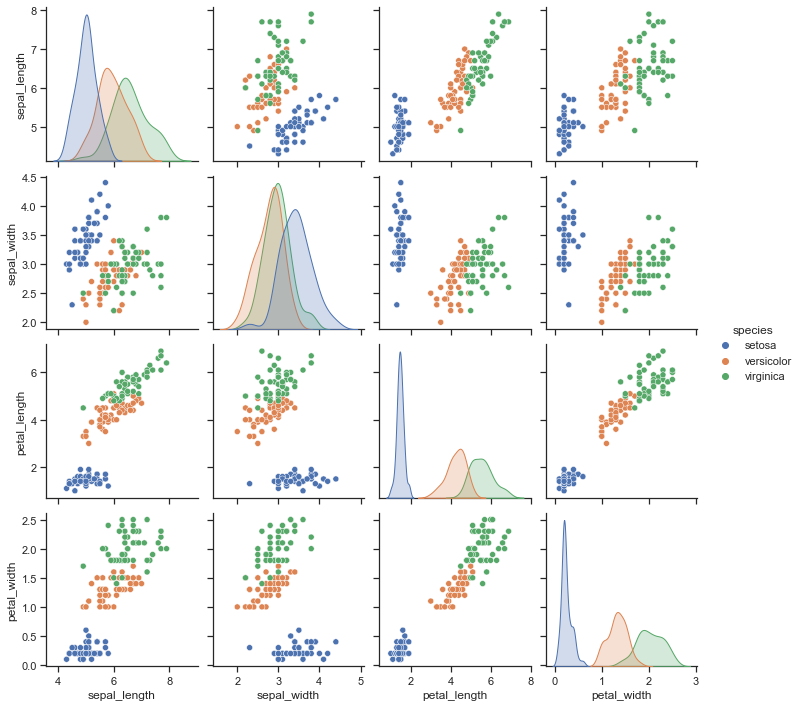

In [4]:
g = sns.pairplot(df, hue="species")

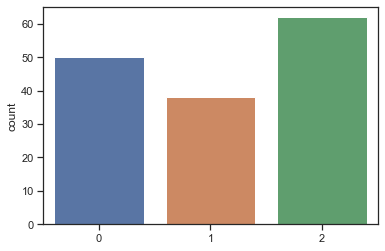

In [5]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Hapus "random_state = random_state" jika ingin melihat efek randomized centroid.
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(C_km)

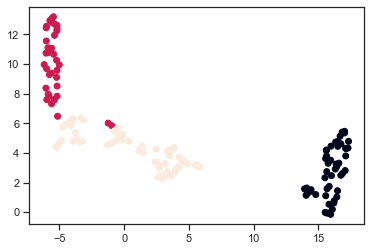

In [6]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

# Apa beda label ini dengan klasifikasi ("labels")?

In [7]:
C_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

# Evaluasi? - Inertia : Intra Cluster Distance

* Bagaimana memaknainya?
* Bukan Error! ... Mengapa?
* Belum ada faktor "inter distance" ==> nanti Silhouette Score

<img src="images/inertia_calc.png" />

### image source: https://www.unioviedo.es/compnum/labs/new/kmeans.html

In [8]:
km.inertia_

78.851441426146

# Optimal Number of Clusters? - Elbow Method - 

* Menggunakan inertia
* Rekomendasi ... Bukan "wajib" ==> Lalu apa yang lebih penting?

Text(0.5, 1.0, 'Elbow curve')

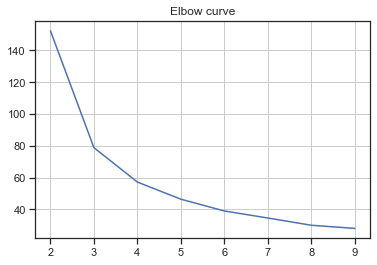

In [9]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

# Ponder this

### Apakah akibat dari mengacak (randomized) centroid di awal algoritma?
### k-Means sangat tidak direkomendasikan untuk diaplikasikan di aplikasi nyata ... Loh? Mengapa?

# <center><font color="blue"> End of Module Korelasi-Regresi-Logistik

<hr />
<img alt="" src="images/meme_04_regression.png"/>